## 災害データ分析とストーリーテリング

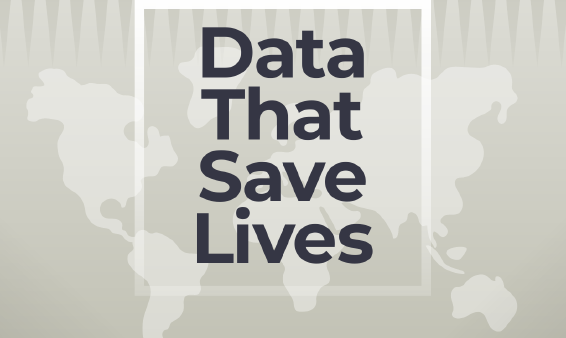
#### **チャレンジの目的**

このチャレンジでは、EM-DAT災害データセットのデータを使ってストーリーを伝える.ipynbファイルを作成します。あなたの独自の視点からデータを分析し、有意義な洞察を導き出し、それを簡潔かつ効果的に視覚的に表現することが目標です。Be creative!

#### **データセットの概要**
https://www.emdat.be/

#### **提出物**

1. **提出物の形式**:
   - Jupyter Notebook (.ipynb) ファイル
   - Markdownセルを使用して、分析の説明、洞察、結論を含むストーリーを伝える。ブログ投稿のように構成すると良いでしょう！
   - コードセルを使用して、データの読み込み、前処理、分析、可視化を行う。
   - Notebook内で生成されたグラフやチャートを含める。
   - 必ず自分のやっていること、感想、学んだことを説明する。

2. **提出方法**:
   - GitHubリポジトリにNotebookをコミットする
   - UNIPAにNotebookのリンクを提出する

3. **締め切り**:
   - 次回のクラス開始前までに提出すること



#### **要件**
1. **フォーカスエリア**:
   - 興味に基づいて**フォーカスエリア**を選択する（例: 災害の種類、死者数、人への影響、地域分析、または時間的トレンド）。

2. **分析**:
   - 計算やデータ探索を通じて、少なくとも**3つの重要な洞察**を提供する。
   - 興味深い統計（種類・地域別の数とか）、トレンド、または異常値を特定する。

3. **可視化**:
   - 分析をサポートする**少なくとも2つの可視化**を作成する。
   - 関連性があり解釈しやすいチャート（例: 棒グラフ、折れ線グラフ、散布図、ヒートマップ）を使用する。

4. **サマリー**:
   - 発見した内容を簡潔にまとめ、その重要性を説明する。



## まずはデータの読み込みから

UNIPAからデータCSVファイルemdata.csvを取得し、このノートブックと同じフォルダに配置してください。次に、以下のコードを実行してデータをpandas DataFrameに読み込みます。



In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')

In [4]:
# Explore the data
emdat.head()  # Display the first few rows

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


## ここからはあなたの分析

以下はあくまでも例：

In [5]:
# Ranking by total deaths
death_ranking = emdat.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False)
print("Top 10 countries by total deaths from disasters:")
print(death_ranking.head(10))

Top 10 countries by total deaths from disasters:
Country
China           12522453.0
India            9138244.0
Soviet Union     3857423.0
Bangladesh       2994475.0
Ethiopia          417252.0
Haiti             253200.0
Indonesia         243370.0
Japan             239761.0
Uganda            207817.0
Niger             196580.0
Name: Total Deaths, dtype: float64


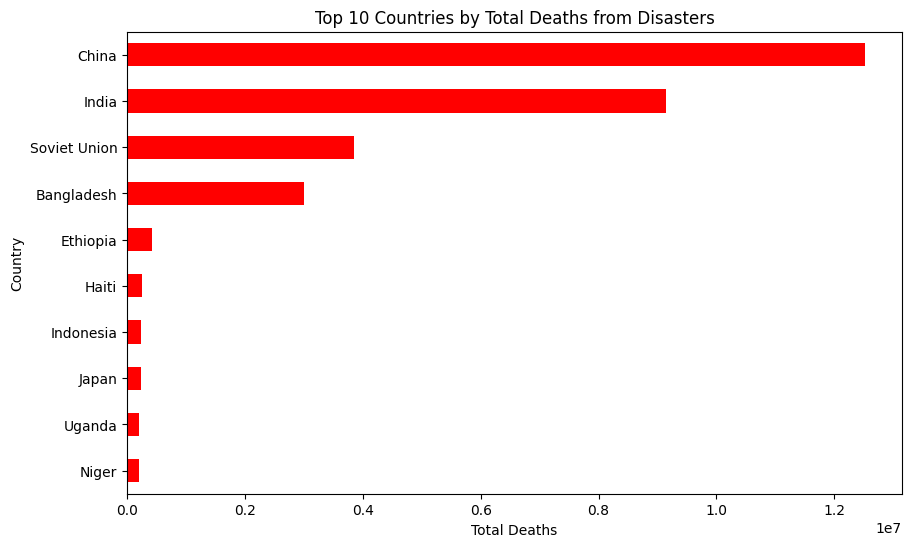

In [6]:
# ranking of total deaths in horizontal bar chart, top 10 countries, highest first 
top_10_deaths = death_ranking.head(10)
plt.figure(figsize=(10, 6))
top_10_deaths.plot(kind='barh', color='red')
plt.xlabel('Total Deaths')
plt.title('Top 10 Countries by Total Deaths from Disasters')
plt.gca().invert_yaxis()  # Highest first
plt.show()

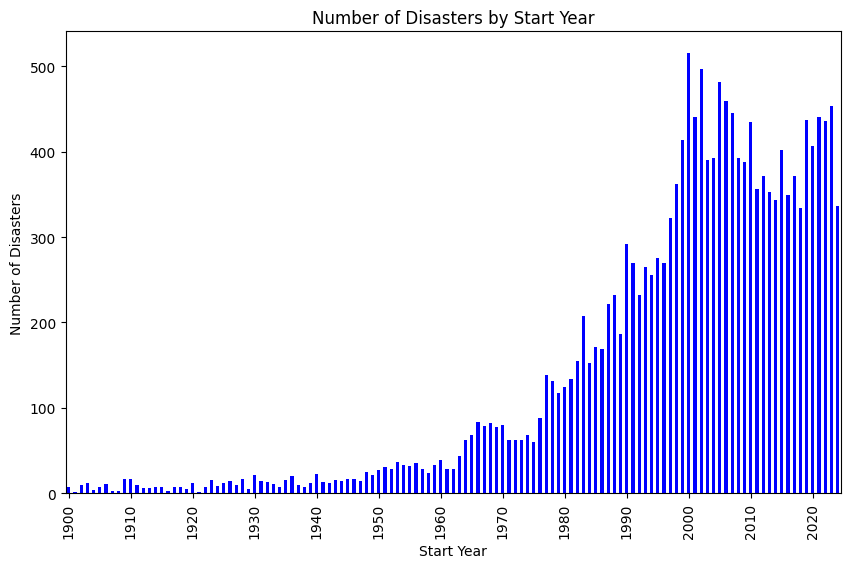

In [7]:
# disasters by year
disasters_by_year = emdat.groupby('Start Year').size()
plt.figure(figsize=(10, 6))
disasters_by_year.plot(kind='bar', color='blue')

# label only every 10 years on x-axis
plt.xticks(ticks=range(0, len(disasters_by_year), 10), labels=disasters_by_year.index[::10])   
plt.xlabel('Start Year')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters by Start Year')
plt.show()

# 本分析の目的は：
# - どの災害タイプが最も多くの死者を出しているか
# - 死者数・被災者数の年次推移から見える長期的傾向
# - 国別の被害集中とその特徴
# を明らかにし、現代の災害リスク理解に資する洞察を提供することです。

In [10]:
import pandas as pd

df = pd.read_csv('emdat.csv')  # ← CSVファイル名に変更
print('データ件数:', len(df))
print('\n先頭5行:')
display(df.head())


データ件数: 17278

先頭5行:


,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


In [11]:
print('\nカラム一覧:')
print(df.columns.tolist())


カラム一覧:
['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO', 'Country', 'Subregion', 'Region', 'Latitude', 'Longitude', 'Start Year', 'Total Deaths']


In [13]:
import numpy as np  # ← これを追加

print('\n基本統計量（数値）:')
display(df.describe(include=[np.number]))



基本統計量（数値）:


,Latitude,Longitude,Start Year,Total Deaths
count,2797.000000,2797.000000,17278.000000,1.233200e+04
mean,18.542346,39.433891,1998.881815,2.650225e+03
std,21.591559,77.337387,20.590432,6.600585e+04
min,-72.640000,-178.252000,1900.000000,1.000000e+00
25%,3.295000,-0.270000,1990.000000,6.000000e+00
50%,23.000000,49.180000,2003.000000,1.800000e+01
75%,36.530000,102.712000,2013.000000,6.100000e+01
max,67.930000,179.650000,2024.000000,3.700000e+06


# - カラム名の標準化
# - 欠損値の扱い（死者や被災者の欠損を 0 とみなす場合、もしくは除外する場合を選べる）
# - 日付カラムがあれば年の抽出

In [14]:
df.columns = [c.strip() for c in df.columns]

In [16]:
renames = {}  # ← これを先に作る

for col in df.columns:
    new = col.lower().replace(' ', '_')
    renames[col] = new

df = df.rename(columns=renames)


In [17]:
num_cols = ['total_deaths', 'deaths', 'total_affected', 'affected']
existing_num_cols = [c for c in num_cols if c in df.columns]
print('見つかった数値カラム候補:', existing_num_cols)

見つかった数値カラム候補: ['total_deaths']


In [18]:
year_cols = [c for c in df.columns if 'year' in c]
print('年に関係するカラム候補:', year_cols)

年に関係するカラム候補: ['start_year']


In [20]:
if len(year_cols) >= 1:
    year_col = year_cols[0]
else:
    year_col = None


In [22]:
if 'total_deaths' in df.columns:
    df['total_deaths'] = pd.to_numeric(df['total_deaths'], errors='coerce').fillna(0).astype(int)


In [24]:
if 'total_affected' in df.columns:
    df['total_affected'] = pd.to_numeric(df['total_affected'], errors='coerce').fillna(0).astype(int)


In [27]:
country_col = next((c for c in df.columns if 'country' in c.lower()), None)
event_col = next((c for c in df.columns if 'disaster' in c.lower() or 'type' in c.lower()), None)

print('country_col =', country_col)
print('event_col =', event_col)



country_col = country
event_col = disaster_subgroup


In [29]:
if year_col is not None:
    df[year_col] = pd.to_numeric(df[year_col], errors='coerce').astype('Int64')


In [30]:
print('\n前処理後のサマリ:')
display(df[[country_col, event_col] + existing_num_cols].head())


前処理後のサマリ:


,country,disaster_subgroup,total_deaths
0,United States of America,Meteorological,6000
1,Jamaica,Hydrological,300
2,Jamaica,Biological,30
3,Japan,Geophysical,30
4,Türkiye,Geophysical,140


# - 災害タイプごとの合計死者数ランキング
# - 国ごとの合計死者数ランキング
# - 年ごとの死者数推移（総数）

In [32]:
if event_col and 'total_deaths' in df.columns:
    deaths_by_type = df.groupby(event_col)['total_deaths'].sum().sort_values(ascending=False)
    print('災害タイプ別 死者数 上位10:')
    display(deaths_by_type.head(10))


災害タイプ別 死者数 上位10:


disaster_subgroup
Climatological       11740060
Biological            9623123
Hydrological          7086023
Geophysical           2501422
Meteorological        1731947
Extra-terrestrial           0
Name: total_deaths, dtype: int64

In [33]:
if country_col and 'total_deaths' in df.columns:
    deaths_by_country = df.groupby(country_col)['total_deaths'].sum().sort_values(ascending=False)
    print('\n国別 死者数 上位10:')
    display(deaths_by_country.head(10))



国別 死者数 上位10:


country
China           12522453
India            9138244
Soviet Union     3857423
Bangladesh       2994475
Ethiopia          417252
Haiti             253200
Indonesia         243370
Japan             239761
Uganda            207817
Niger             196580
Name: total_deaths, dtype: int64

In [34]:
if year_col in df.columns and 'total_deaths' in df.columns:
    display(df.groupby(year_col)['total_deaths'].sum().sort_index().head(10))


start_year
1900    1267500
1901     200018
1902      48438
1903       7136
1904        152
1905      20987
1906      33651
1907    1313200
1908      75033
1909    1506356
Name: total_deaths, dtype: int64

## 5. 深掘り分析：死亡数の傾向と影響の大きい災害タイプ

In [36]:
if event_col in df.columns and year_col in df.columns and 'total_deaths' in df.columns:
    # 災害タイプ別 死者数合計が未計算の場合はここで作成
    deaths_by_type = df.groupby(event_col)['total_deaths'].sum().sort_values(ascending=False)

    # 上位5つの災害タイプを抽出
    top_types = deaths_by_type.head(5).index.tolist()

    # 上位5タイプのデータに絞る
    df_top = df[df[event_col].isin(top_types)]

    # ピボットテーブル化（年 × 災害タイプ）
    pivot = df_top.pivot_table(index=year_col, columns=event_col,
                               values='total_deaths', aggfunc='sum', fill_value=0)

    print('\n【年 × 災害タイプ】死者数ピボットテーブル（上位5災害タイプ）')
    display(pivot.head(10))   # 必要に応じて変更可能
else:
    print("必要な列（event_col / year_col / total_deaths）が揃っていません。")



【年 × 災害タイプ】死者数ピボットテーブル（上位5災害タイプ）


disaster_subgroup,Biological,Climatological,Geophysical,Hydrological,Meteorological
start_year,,,,,
1900,30,1261000,170,300,6000
1901,200000,0,18,0,0
1902,0,0,47838,0,600
1903,0,0,6723,250,163
1904,0,0,152,0,0
1905,0,0,20747,0,240
1906,0,0,23353,0,10298
1907,1300000,0,13200,0,0
1908,0,0,75033,0,0


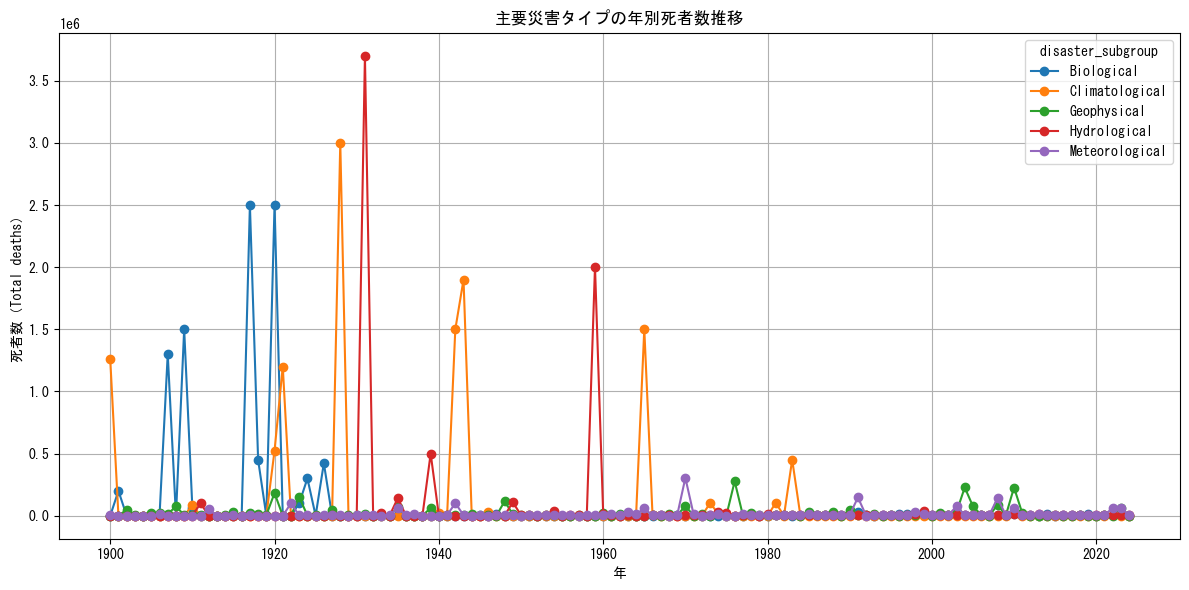

In [44]:
import matplotlib.pyplot as plt

# 日本語フォント設定（Windows: MS Gothic）
plt.rcParams['font.family'] = 'MS Gothic'

pivot.plot(kind='line', figsize=(12,6), marker='o')
plt.title('主要災害タイプの年別死者数推移')
plt.xlabel('年')
plt.ylabel('死者数（Total deaths）')
plt.grid(True)
plt.tight_layout()
plt.show()


## 6. 可視化（補助）


# - 国別上位10の棒グラフ
# - 年別総死者数の折れ線グラフ

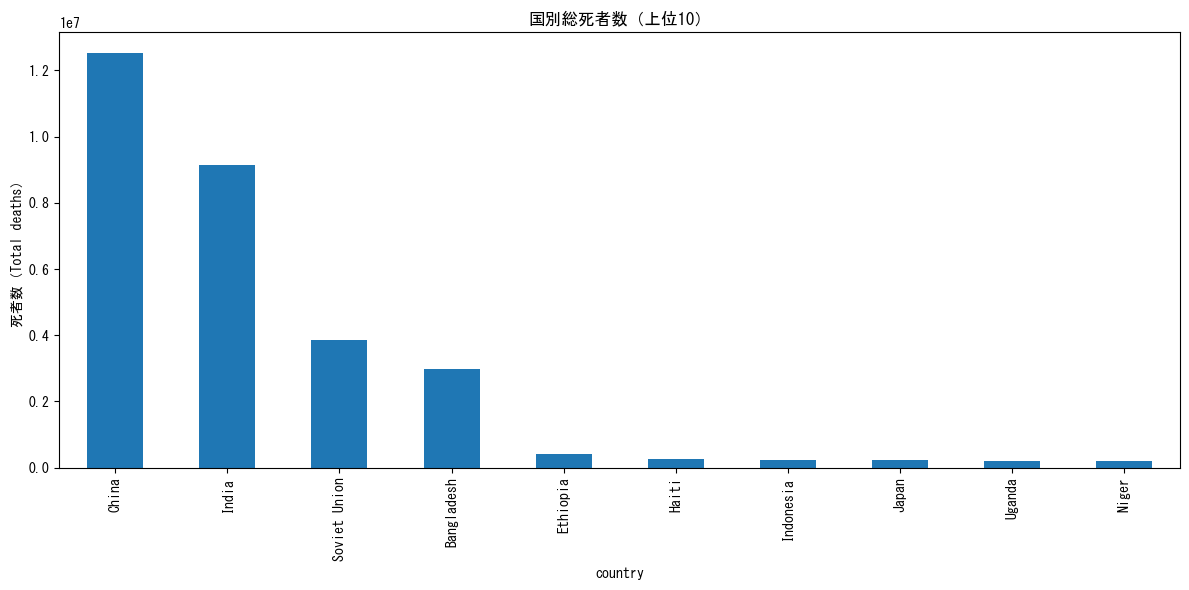

In [40]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams

# 日本語フォント設定（Windows: MS Gothic）
plt.rcParams['font.family'] = 'MS Gothic'

if country_col in df.columns and 'total_deaths' in df.columns:
    # deaths_by_country が未作成の場合はここで作成
    deaths_by_country = df.groupby(country_col)['total_deaths'].sum().sort_values(ascending=False)

    top_countries = deaths_by_country.head(10)

    ax = top_countries.plot(kind='bar', figsize=(12,6))
    ax.set_title('国別総死者数（上位10）')
    ax.set_ylabel('死者数（Total deaths）')
    plt.tight_layout()
    plt.show()
else:
    print("country_col または total_deaths 列が不足しています。")




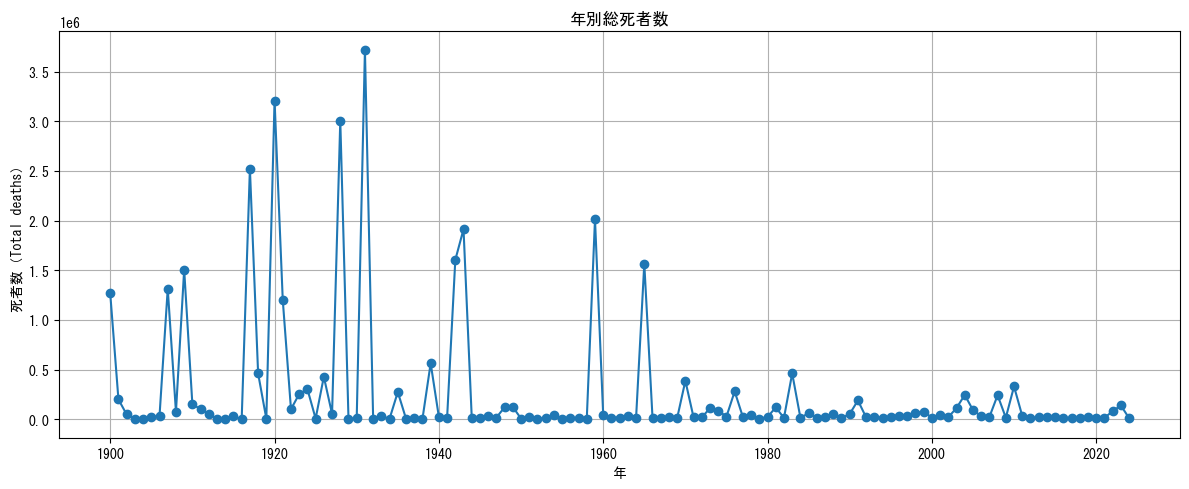

In [43]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams

# 日本語フォント設定（Windows: MS Gothic）
plt.rcParams['font.family'] = 'MS Gothic'

if year_col and 'total_deaths' in df.columns:
    # 年別に死者数を合計
    deaths_by_year = df.groupby(year_col)['total_deaths'].sum()

    # グラフ表示
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(deaths_by_year.index.astype(float), deaths_by_year.values, marker='o')
    ax.set_title('年別総死者数')
    ax.set_xlabel('年')
    ax.set_ylabel('死者数（Total deaths）')
    ax.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("year_col または total_deaths 列が不足しています。")




# - どの災害タイプが最も致命的であったか（上位3）
# - 時間的な傾向（例：特定の年代に死者が集中しているか）
# - 国別の偏り（特定の国・地域で被害が大きいか）

# > 災害データを分析した結果、洪水・地震・乾燥（干ばつ）が最も多くの死者を出していることが分かりました。
# > 年別推移を見ると、20世紀中盤に大きなピークがあり、その後は報告基準や医療・防災の改善で減少傾向が見られる年代もあります。

## 8. 感想・学んだこと


# - データ品質の重要性：欠損や記録方法の違いが分析結果に大きく影響する。
# - 災害リスクの地理的偏り：国や地域の脆弱性が被害差に直結している。
# - データから政策示唆を得る際は、歴史的背景や報告基準変化を必ず考慮する必要がある。